In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/adj_price.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [4]:
# Calculate daily returns
ret = (df - df.shift()) / df.shift()
# ret = np.log(df) - np.log(df.shift())
# do not drop NA

In [5]:
# remove STI
ret = ret.drop('^STI', axis=1)

In [6]:
# # Calculate mean and covariance of daily log return
# mu = ret.mean()
# S = ret.cov()

In [7]:
# Calculate mean and covariance of annual log return
mu = ret.mean() * ret.shape[0]
S = ret.cov() * ret.shape[0]

In [8]:
# # Calculate mean and covariance of monthly log return
# mu = ret.mean() * 30
# S = ret.cov() * 30

In [9]:
# Plot the portfolios
plot_df = pd.DataFrame({'mu':mu, 'S':np.sqrt(np.diag(S))})

In [10]:
plot_df

,mu,S
D05.SI,0.139727,0.146704
G13.SI,-0.012338,0.188645
S58.SI,0.133497,0.155976
S63.SI,0.046637,0.167491
S68.SI,0.364446,0.162432


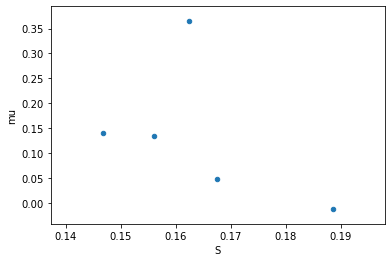

In [11]:
plot_df.plot.scatter(x='S', y='mu')

In [12]:
# Calculate correlation
r = ret.corr()
r

,D05.SI,G13.SI,S58.SI,S63.SI,S68.SI
D05.SI,1.000000,0.448306,0.380283,0.339773,0.308579
G13.SI,0.448306,1.000000,0.220907,0.249097,0.135374
S58.SI,0.380283,0.220907,1.000000,0.310254,0.206210
S63.SI,0.339773,0.249097,0.310254,1.000000,0.319611
S68.SI,0.308579,0.135374,0.206210,0.319611,1.000000


In [13]:
# Portfolio analysis
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

In [14]:
# optimize wrt max sharpe ratio
raw_weights = ef.max_sharpe(risk_free_rate=0.02)
cleaned_weights = ef.clean_weights()

In [15]:
# View clean weights
cleaned_weights

{'D05.SI': 0.03411,
 'G13.SI': 0.0,
 'S58.SI': 0.11985,
 'S63.SI': 0.0,
 'S68.SI': 0.84605}

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 32.9%
Annual volatility: 14.4%
Sharpe Ratio: 2.14


(0.32910327466868217, 0.14429160656248216, 2.1422124407134664)

In [19]:
# how much of each stock to buy?
capital = 10000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

2 out of 5 tickers were removed
Discrete allocation: {'D05.SI': 13, 'S58.SI': 237, 'S68.SI': 919}
Funds remaining: $3.05
